# Исследовательский анализ данных и проверка гипотез в бизнесе (туризм в России)

- Автор: Прудникова Диана

### Цели и задачи проекта

**Цель**: изучить данные о туризме в России, а также проверить несколько гипотез, которые покажут динамику туристической индустрии.

**Задачи**:

1. Загрузить, познакомиться и подготовить данные;
2. Провести исследовательский анализ данных;
3. Проверить следующие гипотезы:
  - средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей,
  - в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты.
4. Сформулировать итоговый вывод и дать рекомендации на основе проведенного анализа.</font>

## 1. Загрузка и подготовка данных.

**Импортируем необходимые библиотеки.**

In [1]:
# Импортируем библиотеки 
import pandas as pd

#Для построения графиков используем библиотеки matplotlib и seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеку numpy 
import numpy as np

# Импортируем библиотеку модуль scipy.stats из библиотеки SciPy
from scipy import stats as st

**Выгружаем данные.**

**Выводим название столбцов датафреймов.**

In [3]:
# Выводим названия столбцов
display(df_person.columns, df_firm.columns, df_cost.columns, df_cost.columns)

Index(['Субъект', 'Численность лиц, размещенных в гостиницах в 2023 году',
       'Численность граждан России, размещенных в гостиницах в 2023 году',
       'Численность иностранных граждан, размещенных в гостиницах в 2023 году'],
      dtype='object')

Index(['Субъект', 'Общее число турпакетов, реализованных населению, 2018',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2018',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2018',
       'Общее число турпакетов, реализованных гражданам других стран по территории России, 2018',
       'Общее число турпакетов, реализованных населению, 2019',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2019',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2019',
       'Общее число турпакетов, реализованных гражданам других стран по территории России, 2019',
       'Общее число турпакетов, реализованных населению, 2020',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2020',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2020',
       'Общее число турпакетов, реализованных гражданам др

Index(['Субъект', 'Стоимость реализованных турпакетов в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.'],
      dtype='object')

Index(['Субъект', 'Стоимость реализованных турпакетов в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.'],
      dtype='object')

**Переименуем названия столбцов на более оптимальные.**

In [4]:
# Сохраняем в список желаемые названия столбцов датасета df_person  
columns_person = ['subject', 'count_people_staying_2023','count_people_russian_staying_2023', 
                  'count_people_foreign_staying_2023']
 # Передаём список атрибуту columns датафрейма
df_person.columns = columns_person
print (df_person.columns)

Index(['subject', 'count_people_staying_2023',
       'count_people_russian_staying_2023',
       'count_people_foreign_staying_2023'],
      dtype='object')


In [5]:
# Сохраняем в список желаемые названия столбцов датасета df_firm  
columns_firm = ['subject', 'total_count_tour_packages_2018','total_count_packages_russian_2018',
                'total_count_packages_russian_countries_2018',
                'total_count_packages_citizens_countries_russian_territory_2018',
                'total_count_tour_packages_2019','total_count_packages_russian_2019',
                'total_count_packages_russian_countries_2019',
                'total_count_packages_citizens_countries_russian_territory_2019',
                'total_count_tour_packages_2020','total_count_packages_russian_2020',
                'total_count_packages_russian_countries_2020',
                'total_count_packages_citizens_countries_russian_territory_2020',
               'total_count_tour_packages_2021','total_count_packages_russian_2021',
                'total_count_packages_russian_countries_2021',
                'total_count_packages_citizens_countries_russian_territory_2021',
               'total_count_tour_packages_2022','total_count_packages_russian_2022',
                'total_count_packages_russian_countries_2022',
                'total_count_packages_citizens_countries_russian_territory_2022',
                'total_count_tour_packages_2023','total_count_packages_russian_2023',
                'total_count_packages_russian_countries_2023',
                'total_count_packages_citizens_countries_russian_territory_2023']
 # Передаём список атрибуту columns датафрейма
df_firm.columns = columns_firm
print (df_firm.columns)

Index(['subject', 'total_count_tour_packages_2018',
       'total_count_packages_russian_2018',
       'total_count_packages_russian_countries_2018',
       'total_count_packages_citizens_countries_russian_territory_2018',
       'total_count_tour_packages_2019', 'total_count_packages_russian_2019',
       'total_count_packages_russian_countries_2019',
       'total_count_packages_citizens_countries_russian_territory_2019',
       'total_count_tour_packages_2020', 'total_count_packages_russian_2020',
       'total_count_packages_russian_countries_2020',
       'total_count_packages_citizens_countries_russian_territory_2020',
       'total_count_tour_packages_2021', 'total_count_packages_russian_2021',
       'total_count_packages_russian_countries_2021',
       'total_count_packages_citizens_countries_russian_territory_2021',
       'total_count_tour_packages_2022', 'total_count_packages_russian_2022',
       'total_count_packages_russian_countries_2022',
       'total_count_packages_c

In [6]:
# Сохраняем в список желаемые названия столбцов датасета df_cost
cost_columns = ['subject','value_realized_packages_2023_ml_rub',
                'value_realized_packages_of_russia_territory_russia_2023_ml_rub',
               'value_realized_packages_of_russia_other_countries']
# Передаём список атрибуту columns датафрейма
df_cost.columns = cost_columns
print (df_cost.columns)

Index(['subject', 'value_realized_packages_2023_ml_rub',
       'value_realized_packages_of_russia_territory_russia_2023_ml_rub',
       'value_realized_packages_of_russia_other_countries'],
      dtype='object')


In [7]:
# Сохраняем в список желаемые названия столбцов датасета df_cost
hotel_columns = ['subject', 'count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
                'count_hotels_2021','count_hotels_2022','count_hotels_2023','count_places_hotels_2018',
                'count_places_hotels_2019','count_places_hotels_2020','count_places_hotels_2021',
                'count_places_hotels_2022','count_places_hotels_2023','count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021','count_hostelov_2022','count_hostelov_2023',
                'count_places_hostelov_2018','count_places_hostelov_2019','count_places_hostelov_2020',
                 'count_places_hostelov_2021','count_places_hostelov_2022','count_places_hostelov_2023',
                 'count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 'count_sanatorium_2023',
                'count_places_sanatorium_2018','count_places_sanatorium_2019','count_places_sanatorium_2020',
                'count_places_sanatorium_2021','count_places_sanatorium_2022','count_places_sanatorium_2023']
# Передаём список атрибуту columns датафрейма
df_hotel.columns = hotel_columns
print (df_hotel.columns)

Index(['subject', 'count_hotels_2018', 'count_hotels_2019',
       'count_hotels_2020', 'count_hotels_2021', 'count_hotels_2022',
       'count_hotels_2023', 'count_places_hotels_2018',
       'count_places_hotels_2019', 'count_places_hotels_2020',
       'count_places_hotels_2021', 'count_places_hotels_2022',
       'count_places_hotels_2023', 'count_hostelov_2018',
       'count_hostelov_2019', 'count_hostelov_2020', 'count_hostelov_2021',
       'count_hostelov_2022', 'count_hostelov_2023',
       'count_places_hostelov_2018', 'count_places_hostelov_2019',
       'count_places_hostelov_2020', 'count_places_hostelov_2021',
       'count_places_hostelov_2022', 'count_places_hostelov_2023',
       'count_sanatorium_2018', 'count_sanatorium_2019',
       'count_sanatorium_2020', 'count_sanatorium_2021',
       'count_sanatorium_2022', 'count_sanatorium_2023',
       'count_places_sanatorium_2018', 'count_places_sanatorium_2019',
       'count_places_sanatorium_2020', 'count_places_sanat

**Знакомимся с данными. Выводим первые пять строк и общую информацию о датафреймах.**

In [8]:
# Выводим первые пять строк датафреймов
display(df_person.head())
display(df_firm.head()) 
display(df_cost.head())
display(df_hotel.head())

,subject,count_people_staying_2023,count_people_russian_staying_2023,count_people_foreign_staying_2023
0,Белгородская область,180442,177536,2906
1,Брянская область,182217,173980,8237
2,Владимирская область,526768,517456,9312
3,Воронежская область,760489,732562,27927
4,Ивановская область,227632,225030,2602


,subject,total_count_tour_packages_2018,total_count_packages_russian_2018,total_count_packages_russian_countries_2018,total_count_packages_citizens_countries_russian_territory_2018,total_count_tour_packages_2019,total_count_packages_russian_2019,total_count_packages_russian_countries_2019,total_count_packages_citizens_countries_russian_territory_2019,total_count_tour_packages_2020,...,total_count_packages_russian_countries_2021,total_count_packages_citizens_countries_russian_territory_2021,total_count_tour_packages_2022,total_count_packages_russian_2022,total_count_packages_russian_countries_2022,total_count_packages_citizens_countries_russian_territory_2022,total_count_tour_packages_2023,total_count_packages_russian_2023,total_count_packages_russian_countries_2023,total_count_packages_citizens_countries_russian_territory_2023
0,Белгородская область,14138,4333,9805,NaN,20646,4772,15874,NaN,9694,...,9239.0,NaN,15222,8887,6165,170.0,17733,11803,5930.0,NaN
1,Брянская область,9444,4438,5004,2.0,10459,4966,5492,1,3435,...,3479.0,NaN,11591,8265,3326,NaN,10165,5377,4788.0,NaN
2,Владимирская область,23900,12294,11243,363.0,23065,11558,10394,1113,7334,...,6426.0,7,18288,11359,6924,5.0,22334,13588,8737.0,9.0
3,Воронежская область,14554,8124,6430,NaN,14464,4613,9851,NaN,6681,...,7923.0,NaN,20958,13608,7350,NaN,24993,14781,10212.0,NaN
4,Ивановская область,17049,6592,10457,NaN,17019,8327,8692,NaN,6477,...,4445.0,NaN,13637,8575,5062,NaN,18904,11002,7902.0,NaN


,subject,value_realized_packages_2023_ml_rub,value_realized_packages_of_russia_territory_russia_2023_ml_rub,value_realized_packages_of_russia_other_countries
0,Белгородская область,1731.9856000000002,451.745,1280.2406
1,Брянская область,1409.2361,455.8798,953.3563
2,Владимирская область,2619.7022,912.2325,1706.2733999999998
3,Воронежская область,2877.2381,688.3641,2188.874
4,Ивановская область,1906.7206999999999,612.5177,1294.203


,subject,count_hotels_2018,count_hotels_2019,count_hotels_2020,count_hotels_2021,count_hotels_2022,count_hotels_2023,count_places_hotels_2018,count_places_hotels_2019,count_places_hotels_2020,...,count_sanatorium_2020,count_sanatorium_2021,count_sanatorium_2022,count_sanatorium_2023,count_places_sanatorium_2018,count_places_sanatorium_2019,count_places_sanatorium_2020,count_places_sanatorium_2021,count_places_sanatorium_2022,count_places_sanatorium_2023
0,Белгородская область,97,101,103,100,101,99,4753,5144,5390,...,11,11,11,11,1969,1938,1969,1969,2212,1999
1,Брянская область,74,78,86,92,91,93,3436,3507,3782,...,14,14,14,13,2953,2829,2430,2837,2672,2937
2,Владимирская область,100,100,114,119,121,125,7679,8059,8815,...,6,8,9,8,1220,1324,1205,1530,1542,1328
3,Воронежская область,141,147,151,163,170,179,9605,10419,10040,...,15,15,14,14,3241,3302,3320,3320,3243,3337
4,Ивановская область,48,52,55,74,64,59,2774,2998,3009,...,14,17,15,15,4347,4341,4485,4616,4396,4293


In [9]:
# Выводим общую информацию о датафреймах
display(df_person.info())
display(df_firm.info()) 
display(df_cost.info())
display(df_hotel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   subject                            82 non-null     object
 1   count_people_staying_2023          82 non-null     int64 
 2   count_people_russian_staying_2023  82 non-null     int64 
 3   count_people_foreign_staying_2023  82 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   subject                                                         82 non-null     object 
 1   total_count_tour_packages_2018                                  82 non-null     object 
 2   total_count_packages_russian_2018                               82 non-null     object 
 3   total_count_packages_russian_countries_2018                     81 non-null     object 
 4   total_count_packages_citizens_countries_russian_territory_2018  62 non-null     float64
 5   total_count_tour_packages_2019                                  82 non-null     object 
 6   total_count_packages_russian_2019                               82 non-null     object 
 7   total_count_packages_russian_countries_2019            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   subject                                                         87 non-null     object
 1   value_realized_packages_2023_ml_rub                             87 non-null     object
 2   value_realized_packages_of_russia_territory_russia_2023_ml_rub  87 non-null     object
 3   value_realized_packages_of_russia_other_countries               87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   subject                       81 non-null     object
 1   count_hotels_2018             81 non-null     int64 
 2   count_hotels_2019             81 non-null     int64 
 3   count_hotels_2020             81 non-null     int64 
 4   count_hotels_2021             81 non-null     int64 
 5   count_hotels_2022             81 non-null     int64 
 6   count_hotels_2023             81 non-null     int64 
 7   count_places_hotels_2018      81 non-null     int64 
 8   count_places_hotels_2019      81 non-null     int64 
 9   count_places_hotels_2020      81 non-null     int64 
 10  count_places_hotels_2021      81 non-null     int64 
 11  count_places_hotels_2022      81 non-null     int64 
 12  count_places_hotels_2023      81 non-null     int64 
 13  count_hostelov_2018   

None

**Вывод по первичному знакомству**. Первое знакомство с данными показало, что в целом, качество данных достаточно хорошее.

Датафрейм `df_person` содержит 4 колонки размером 82 строки, которые хранят информацию о численности лиц, раззмещенных в гостиницах в 2023 году по субъектам РФ. Данные представлены в корректных типах - столбцы с количесвом человек имеют целочисленный тип, что правильно, а поле `subject` хранит текcтовые данные, что логично для типа `object`.

Датафрейм `df_firm` состоит из 25 столбцов размером 82 строки и содержит информацию об общем количестве реализованных турпакетов по годам, в разрезе субъектов РФ. Данные хранятся в типе `float` и `object`. В этом случае лучше преобразовать данные в числовой тип, кроме колонки `subject`, так как она хранит текст и тип данных `object` здесь корректен. 

Датафрейм `df_cost` состоит из 4 столбцов размером 87 строк и содержит информацию о стоимости реализованных турпакетов в 2023 году, в разрезе субъектов РФ. Данные хранятся в типе `object` и в этом случае будет корректно привести их к вещественному типу `float`, за исключением колонки `subject`, так как она хранит текст. 

Датафрейм `df_hotel` состоит из 37 столбцов размером 81 строка и содержит информацию о числе гостиниц, хостелов и санатрно-курортных организаций по годам, а также количестве мест в них, в разрезе субъектов РФ. в разрезе субъектов РФ. Данные хранятся в типе `object` и `int64`. В данном случае будет корректно привести все колонки к целочисленному типу `int`, за исключением колонки `subject`, так как она хранит текст. 

**Подсчитываем количество пропусков в данных**.

In [10]:
# Для df_person

# Подсчитываем сумму строк с пропусками, применяем метод isna()
display(df_person.isnull().sum().sort_values(ascending=False))

# Подсчитываем долю строк с пропусками
display(round((df_person.isnull().sum() / df_person.shape[0]),2).sort_values(ascending=False))

subject                              0
count_people_staying_2023            0
count_people_russian_staying_2023    0
count_people_foreign_staying_2023    0
dtype: int64

subject                              0.0
count_people_staying_2023            0.0
count_people_russian_staying_2023    0.0
count_people_foreign_staying_2023    0.0
dtype: float64

In [11]:
# Для df_firm

# Подсчитываем сумму строк с пропусками, применяем метод isna()
display(df_firm.isnull().sum().sort_values(ascending=False))

# Подсчитываем долю строк с пропусками
display(round((df_firm.isnull().sum() / df_firm.shape[0]),2).sort_values(ascending=False))

total_count_packages_citizens_countries_russian_territory_2022    40
total_count_packages_citizens_countries_russian_territory_2020    39
total_count_packages_citizens_countries_russian_territory_2023    39
total_count_packages_citizens_countries_russian_territory_2021    37
total_count_packages_citizens_countries_russian_territory_2018    20
total_count_packages_citizens_countries_russian_territory_2019    19
total_count_packages_russian_countries_2021                        2
total_count_packages_russian_countries_2018                        1
total_count_tour_packages_2021                                     1
total_count_packages_russian_countries_2023                        1
total_count_packages_russian_countries_2022                        1
total_count_packages_russian_2021                                  1
total_count_tour_packages_2018                                     0
total_count_packages_russian_countries_2020                        0
total_count_packages_russian_2020 

total_count_packages_citizens_countries_russian_territory_2022    0.49
total_count_packages_citizens_countries_russian_territory_2020    0.48
total_count_packages_citizens_countries_russian_territory_2023    0.48
total_count_packages_citizens_countries_russian_territory_2021    0.45
total_count_packages_citizens_countries_russian_territory_2018    0.24
total_count_packages_citizens_countries_russian_territory_2019    0.23
total_count_packages_russian_countries_2021                       0.02
total_count_packages_russian_countries_2018                       0.01
total_count_tour_packages_2021                                    0.01
total_count_packages_russian_countries_2023                       0.01
total_count_packages_russian_countries_2022                       0.01
total_count_packages_russian_2021                                 0.01
total_count_tour_packages_2018                                    0.00
total_count_packages_russian_countries_2020                       0.00
total_

In [12]:
# Для df_cost

# Подсчитываем сумму строк с пропусками, применяем метод isna()
display(df_cost.isnull().sum().sort_values(ascending=False))

# Подсчитываем долю строк с пропусками
display(round((df_cost.isnull().sum() / df_cost.shape[0]),2).sort_values(ascending=False))

subject                                                           0
value_realized_packages_2023_ml_rub                               0
value_realized_packages_of_russia_territory_russia_2023_ml_rub    0
value_realized_packages_of_russia_other_countries                 0
dtype: int64

subject                                                           0.0
value_realized_packages_2023_ml_rub                               0.0
value_realized_packages_of_russia_territory_russia_2023_ml_rub    0.0
value_realized_packages_of_russia_other_countries                 0.0
dtype: float64

In [13]:
# Для df_hotel

# Подсчитываем сумму строк с пропусками, применяем метод isna()
display(df_hotel.isnull().sum().sort_values(ascending=False))

# Подсчитываем долю строк с пропусками
display(round((df_hotel.isnull().sum() / df_hotel.shape[0]),2).sort_values(ascending=False))

subject                         0
count_places_hostelov_2018      0
count_places_hostelov_2020      0
count_places_hostelov_2021      0
count_places_hostelov_2022      0
count_places_hostelov_2023      0
count_sanatorium_2018           0
count_sanatorium_2019           0
count_sanatorium_2020           0
count_sanatorium_2021           0
count_sanatorium_2022           0
count_sanatorium_2023           0
count_places_sanatorium_2018    0
count_places_sanatorium_2019    0
count_places_sanatorium_2020    0
count_places_sanatorium_2021    0
count_places_sanatorium_2022    0
count_places_hostelov_2019      0
count_hostelov_2023             0
count_hotels_2018               0
count_hostelov_2022             0
count_hotels_2019               0
count_hotels_2020               0
count_hotels_2021               0
count_hotels_2022               0
count_hotels_2023               0
count_places_hotels_2018        0
count_places_hotels_2019        0
count_places_hotels_2020        0
count_places_h

subject                         0.0
count_places_hostelov_2018      0.0
count_places_hostelov_2020      0.0
count_places_hostelov_2021      0.0
count_places_hostelov_2022      0.0
count_places_hostelov_2023      0.0
count_sanatorium_2018           0.0
count_sanatorium_2019           0.0
count_sanatorium_2020           0.0
count_sanatorium_2021           0.0
count_sanatorium_2022           0.0
count_sanatorium_2023           0.0
count_places_sanatorium_2018    0.0
count_places_sanatorium_2019    0.0
count_places_sanatorium_2020    0.0
count_places_sanatorium_2021    0.0
count_places_sanatorium_2022    0.0
count_places_hostelov_2019      0.0
count_hostelov_2023             0.0
count_hotels_2018               0.0
count_hostelov_2022             0.0
count_hotels_2019               0.0
count_hotels_2020               0.0
count_hotels_2021               0.0
count_hotels_2022               0.0
count_hotels_2023               0.0
count_places_hotels_2018        0.0
count_places_hotels_2019    

**Вывод по пропускам**. Наличие пропусков в данных обнаружено в датафрейме `df_firm`, где хранится информация о количетстве реализованных турпакетов по годам. Наибольшее количество пропусков наблюдается в колонках с числом реализованных турпакетов гражданам других стран на территории РФ: 

 - total_count_packages_citizens_countries_russian_territory_2022  - 49%
 - total_count_packages_citizens_countries_russian_territory_2020  - 48%
 - total_count_packages_citizens_countries_russian_territory_2023  - 48%
 - total_count_packages_citizens_countries_russian_territory_2021  - 45%
 - total_count_packages_citizens_countries_russian_territory_2018  - 24%
 - total_count_packages_citizens_countries_russian_territory_2019  - 23%
 
 Это может быть связано с тем, что граждане других стран наиболее редко преобретают турпакеты и пропуски могли возникнуть в результате отсутствия продаж турпакетов иностранным лицам в данных субъектах. В этом случае пропуски можно заменить на ноль. 

**Изучим уникальные значения в числовых столбцах со строковым типом данных датасетов `df_hotel` и `df_firm` и `df_cost`.**

In [14]:
# Выводим уникальные значения
df_hotel['count_places_hostelov_2018'].unique()

array(['192', '0', '954', '1257', '184', '432', '356', '…1', '350',
       '5822', '352', '226', '491', '341', '428', '94749', '284', '163',
       '195', '1398', '1059', '675', '814', '439', '221', '8833', '1144',
       '6291', '136', '1494', '1183', '151', '375', '648', '667', '741',
       '3815', '329', '206', '854', '173', '2731', '589', '1178', '1661',
       '150', '199', '2671', '1399', '483', '571', '1081', '597', '787',
       '806', '307', '466', '83', '134', '261', '662', '924', '106',
       '256'], dtype=object)

In [15]:
# Настраиваем параметры печати массивов
import numpy as np

np.set_printoptions(suppress=True, precision=3)
for column in ['total_count_tour_packages_2018','total_count_packages_russian_2018',
                'total_count_packages_russian_countries_2018',
                'total_count_packages_citizens_countries_russian_territory_2018',
                'total_count_tour_packages_2019','total_count_packages_russian_2019',
                'total_count_packages_russian_countries_2019',
                'total_count_packages_citizens_countries_russian_territory_2019',
                'total_count_tour_packages_2020','total_count_packages_russian_2020',
                'total_count_packages_russian_countries_2020',
                'total_count_packages_citizens_countries_russian_territory_2020',
               'total_count_tour_packages_2021','total_count_packages_russian_2021',
                'total_count_packages_russian_countries_2021',
                'total_count_packages_citizens_countries_russian_territory_2021',
               'total_count_tour_packages_2022','total_count_packages_russian_2022',
                'total_count_packages_russian_countries_2022',
                'total_count_packages_citizens_countries_russian_territory_2022',
                'total_count_tour_packages_2023','total_count_packages_russian_2023',
                'total_count_packages_russian_countries_2023',
                'total_count_packages_citizens_countries_russian_territory_2023']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_firm[column].sort_values().unique())
    print()

Уникальные значения в столбце total_count_tour_packages_2018:
['10008' '10091' '10481' '106450' '110277' '11186' '1141105' '1184'
 '11872' '12395' '125105' '1267' '13303' '13494' '14138' '14554' '147269'
 '154525' '15890' '15904' '1613' '16721' '168092' '17012' '17049' '170713'
 '17574' '18465' '19361' '19380' '2065' '22309' '22639' '22829' '23900'
 '23960' '25080' '25874' '27151' '2729' '2832' '31355' '31754' '37138'
 '39436' '40073' '41144' '41171' '42175' '42277' '42819' '4333' '45116'
 '45303' '4812' '4937' '49507' '51653' '518939' '53395' '55028' '57406'
 '64739' '69299' '7216' '7514' '75831' '76840' '77505' '84379' '8455'
 '84987' '8597' '90769' '9307' '9426' '9444' '9953' '…1']

Уникальные значения в столбце total_count_packages_russian_2018:
['10970' '112161' '11509' '12014' '12294' '13019' '1319' '13307' '13493'
 '1367' '13828' '1505' '15277' '15739' '16170' '1680' '17477' '17490'
 '20097' '20541' '21535' '21598' '22272' '232453' '233394' '234' '24457'
 '26018' '272' '275' '27

In [16]:
# Настраиваем параметры печати массивов
np.set_printoptions(suppress=True, precision=3)
for column in ['value_realized_packages_2023_ml_rub', 'value_realized_packages_of_russia_territory_russia_2023_ml_rub',
'value_realized_packages_of_russia_other_countries']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_cost[column].sort_values().unique())
    print() 

Уникальные значения в столбце value_realized_packages_2023_ml_rub:
['10044.0213' '10433.0335' '1065.108' '1086.2876' '1098.7844' '1098.9591'
 '1109.5463' '1145.0288999999998' '1149.1998' '11545.6481' '1183.6915'
 '12592.6389' '130.0939' '13768.876199999999' '1409.2361'
 '1421.2141000000001' '14250.5485' '14271.0682' '14332.6665' '144.7691'
 '1486.4226999999998' '1619.1961000000001' '1646.9453999999998'
 '1720.9688999999998' '1731.9856000000002' '1762.6001' '1890.4898'
 '1906.7206999999999' '2071.3352' '2126.7471' '217.92229999999998'
 '2234.6308' '2340.0166' '23785.773100000002' '2467.6429'
 '2599.0528999999997' '2619.7022' '2630.004' '2693.4923' '27151.9902'
 '2785.6072999999997' '2820.0905' '2847.8363999999997' '286.9326'
 '2877.2381' '2894.6778999999997' '3097.9168999999997' '31.232'
 '3218.3624' '3229.3549' '3323.9424' '337.1085' '3484.0842000000002'
 '3562.3378' '3634.43' '3747.541' '3831.0041' '388215.5477' '3911.0061'
 '420.6818' '4237.0029' '45.522' '455.6531' '4626.57709999999

Наблюдаем значение `..1` в большенстве числовых столбцах. 

**Поменяем значение `..1` на 0 во всех датафреймах и обработаем пропущенные значения в `в df_firm`.**  

In [17]:
# Меняем значение ..1 на 0 в датасетах df_hotel и df_firm
df_hotel = df_hotel.replace('...1',0)
df_firm = df_firm.replace('...1',0)
df_cost = df_cost.replace('...1',0)

Проверим успешно ли произошла замена значения `...1` в даттафреймах. 

In [18]:
# Проверяем, встречается ли значение '...1' в любом из столбцов датафреймов
cont_value_cost = (df_cost.isin(['...1']).any()).any()
if cont_value_cost:
    print("Значение '...1' встречается в датафрейме.")
else:
    print("Значение '...1' не встречается в датафрейме df_cost.")
    
cont_value_firm = (df_firm.isin(['...1']).any()).any()
if cont_value_firm:
    print("Значение '...1' встречается в датафрейме.")
else:
    print("Значение '...1' не встречается в датафрейме_df_firm.")  

cont_value_hotel = (df_hotel.isin(['...1']).any()).any()
if cont_value_hotel:
    print("Значение '...1' встречается в датафрейме.")
else:
    print("Значение '...1' не встречается в датафрейме_df_hotel.")          

Значение '...1' не встречается в датафрейме df_cost.
Значение '...1' не встречается в датафрейме_df_firm.
Значение '...1' не встречается в датафрейме_df_hotel.


Далее, заменим пропущенные значения на значение-индикатор 0 в `df_firm`. 

In [19]:
# Заменим пропущенные значения на значение-индикатор 0
df_firm = df_firm.fillna(0)

**Преобразуем типы данных в датасетах df_firm, df_cost и df_hotel в числовые.** Добавим параметр `errors='coerce'`, чтобы при обнаружении ошибок в данных, они заменились на Nan.

In [20]:
# Преобразуем и оптимизируем тип данных в датафрейме df_firm в числовой тип
for column in ['total_count_tour_packages_2018','total_count_packages_russian_2018',
                'total_count_packages_russian_countries_2018',
                'total_count_packages_citizens_countries_russian_territory_2018',
                'total_count_tour_packages_2019','total_count_packages_russian_2019',
                'total_count_packages_russian_countries_2019',
                'total_count_packages_citizens_countries_russian_territory_2019',
                'total_count_tour_packages_2020','total_count_packages_russian_2020',
                'total_count_packages_russian_countries_2020',
                'total_count_packages_citizens_countries_russian_territory_2020',
               'total_count_tour_packages_2021','total_count_packages_russian_2021',
                'total_count_packages_russian_countries_2021',
                'total_count_packages_citizens_countries_russian_territory_2021',
               'total_count_tour_packages_2022','total_count_packages_russian_2022',
                'total_count_packages_russian_countries_2022',
                'total_count_packages_citizens_countries_russian_territory_2022',
                'total_count_tour_packages_2023','total_count_packages_russian_2023',
                'total_count_packages_russian_countries_2023',
                'total_count_packages_citizens_countries_russian_territory_2023']:
    df_firm[column] =  pd.to_numeric(df_firm[column], errors='coerce')
    
df_firm.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   subject                                                         82 non-null     object 
 1   total_count_tour_packages_2018                                  78 non-null     float64
 2   total_count_packages_russian_2018                               78 non-null     float64
 3   total_count_packages_russian_countries_2018                     80 non-null     float64
 4   total_count_packages_citizens_countries_russian_territory_2018  82 non-null     float64
 5   total_count_tour_packages_2019                                  78 non-null     float64
 6   total_count_packages_russian_2019                               78 non-null     float64
 7   total_count_packages_russian_countries_2019            

In [21]:
# Преобразуем и оптимизируем тип данных в датафрейме df_cost в числовой тип
for column in ['value_realized_packages_2023_ml_rub',
            'value_realized_packages_of_russia_territory_russia_2023_ml_rub',
               'value_realized_packages_of_russia_other_countries']:
    df_cost[column] =  pd.to_numeric(df_cost[column], errors='coerce')
    
df_cost.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   subject                                                         87 non-null     object 
 1   value_realized_packages_2023_ml_rub                             85 non-null     float64
 2   value_realized_packages_of_russia_territory_russia_2023_ml_rub  85 non-null     float64
 3   value_realized_packages_of_russia_other_countries               85 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


In [22]:
# Преобразуем и оптимизируем тип данных в датафрейме df_hotel в числовой тип
for column in ['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
                'count_hotels_2021','count_hotels_2022','count_hotels_2023','count_places_hotels_2018',
                'count_places_hotels_2019','count_places_hotels_2020','count_places_hotels_2021',
                'count_places_hotels_2022','count_places_hotels_2023','count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021','count_hostelov_2022','count_hostelov_2023',
                'count_places_hostelov_2018','count_places_hostelov_2019','count_places_hostelov_2020',
                 'count_places_hostelov_2021','count_places_hostelov_2022','count_places_hostelov_2023',
                 'count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 'count_sanatorium_2023',
                'count_places_sanatorium_2018','count_places_sanatorium_2019','count_places_sanatorium_2020',
                'count_places_sanatorium_2021','count_places_sanatorium_2022','count_places_sanatorium_2023']:
    df_hotel[column] =  pd.to_numeric(df_hotel[column], errors='coerce')
    
df_hotel.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subject                       81 non-null     object 
 1   count_hotels_2018             81 non-null     int64  
 2   count_hotels_2019             81 non-null     int64  
 3   count_hotels_2020             81 non-null     int64  
 4   count_hotels_2021             81 non-null     int64  
 5   count_hotels_2022             81 non-null     int64  
 6   count_hotels_2023             81 non-null     int64  
 7   count_places_hotels_2018      81 non-null     int64  
 8   count_places_hotels_2019      81 non-null     int64  
 9   count_places_hotels_2020      81 non-null     int64  
 10  count_places_hotels_2021      81 non-null     int64  
 11  count_places_hotels_2022      81 non-null     int64  
 12  count_places_hotels_2023      81 non-null     int64  
 13  count_h

Данные успешно преобразованы.

## Исследовательский анализ данных.

### 1. Распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.

**1. Распределение гостиниц.**

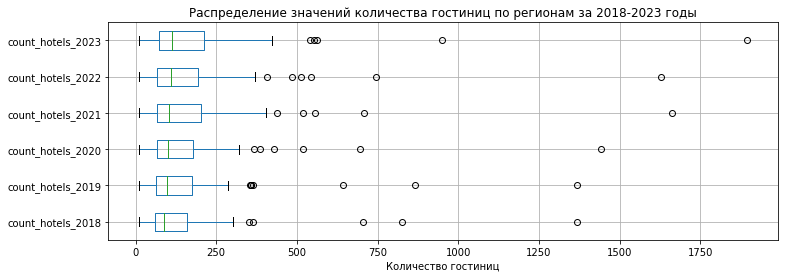

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений количества гостиниц за 2018-2023 года
df_hotel.boxplot(column=['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
                'count_hotels_2021','count_hotels_2022','count_hotels_2023'], vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества гостиниц по регионам за 2018-2023 годы')
plt.xlabel('Количество гостиниц')

plt.show()

Изучим основные показатели количества гостиниц по регионам в разрезе года.

In [24]:
max_value_hotels = df_hotel[['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
        'count_hotels_2021','count_hotels_2022','count_hotels_2023']].max() # максимальное значение для выбранных столбцов

min_value_hotels = df_hotel[['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
        'count_hotels_2021','count_hotels_2022','count_hotels_2023']].min()  # минимальное значение для выбранных столбцов  

mean_value_hotels = df_hotel[['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
        'count_hotels_2021','count_hotels_2022','count_hotels_2023']].mean()# среднее значение для выбранных столбцов  

median_value_hotels = df_hotel[['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
        'count_hotels_2021','count_hotels_2022','count_hotels_2023']].median() # медиана для тех же столбцов 

std_value_hotels = df_hotel[['count_hotels_2018', 'count_hotels_2019','count_hotels_2020',
        'count_hotels_2021','count_hotels_2022','count_hotels_2023']].std() # стандартное отклонение для тех же столбцов 

print (f'Максимальное количество гостиниц по годам {max_value_hotels}')
print (f'Минимальное количество гостиниц по годам {min_value_hotels}')
print (f'Среднее количество гостиниц по годам {mean_value_hotels}')
print (f'Медиана количества гостиниц по годам {median_value_hotels}')
print (f'Стандартное отклонение количества гостиниц по годам {std_value_hotels}')

Максимальное количество гостиниц по годам count_hotels_2018    1369
count_hotels_2019    1369
count_hotels_2020    1443
count_hotels_2021    1662
count_hotels_2022    1627
count_hotels_2023    1896
dtype: int64
Минимальное количество гостиниц по годам count_hotels_2018    10
count_hotels_2019    12
count_hotels_2020    12
count_hotels_2021    12
count_hotels_2022    11
count_hotels_2023    11
dtype: int64
Среднее количество гостиниц по годам count_hotels_2018    144.098765
count_hotels_2019    149.160494
count_hotels_2020    149.037037
count_hotels_2021    159.950617
count_hotels_2022    164.148148
count_hotels_2023    178.024691
dtype: float64
Медиана количества гостиниц по годам count_hotels_2018     87.0
count_hotels_2019     96.0
count_hotels_2020    100.0
count_hotels_2021    103.0
count_hotels_2022    111.0
count_hotels_2023    113.0
dtype: float64
Стандартное отклонение количества гостиниц по годам count_hotels_2018    189.850573
count_hotels_2019    190.102502
count_hotels_2020

**Вывод по распределению количества гостиниц за 2018-2023 года**.
Распределение значений количества гостиниц по всем годам скошено влево, это значит, что у большинства регионов количество гостиниц имеет невысокое значение. Наблюдаюся выбросы в большую сторону. Это мы также видим по числовым показателям: медиана по всем годам ниже среднего значения, например для 2018 года медиана составляет 96, а среднее 190. Максимальные значения по годам варьируются от 1369(2018г.) до 1896 (2023г.), данные выбросы не будем считать ошибкой, так как для крупных и туристических регионов такое количество гостиниц вполне допустимо. 

Также, можно выделить, что медиана, среднее и максимальное значение количества гостиниц растет с 2018 по 2023 год, это может  говорить об увеличении популярности гостиничного типа проживания в регионах.  

**1. Распределение хостелов.**

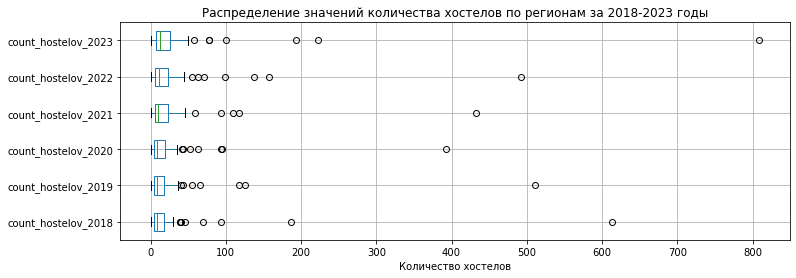

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений количества хостелов за 2018-2023 года
df_hotel.boxplot(column=['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023'], vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества хостелов по регионам за 2018-2023 годы')
plt.xlabel('Количество хостелов')

plt.show()

Показатели количества хостелов по регионам в разрезе года.

In [26]:
max_value_hostel = df_hotel[['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']].max() # максимальное значение для выбранных столбцов

min_value_hostel = df_hotel[['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']].min()  # минимальное значение для выбранных столбцов  

mean_value_hostel = df_hotel[['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']].mean()# среднее значение для выбранных столбцов  

median_value_hostel = df_hotel[['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']].median() # медиана для тех же столбцов 

std_value_hostel = df_hotel[['count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']].std() # стандартное отклонение для тех же столбцов 

print (f'Максимальное количество хостелов по годам {max_value_hostel}')
print (f'Минимальное количество хостелов по годам {min_value_hostel}')
print (f'Среднее количество хостелов по годам {mean_value_hostel}')
print (f'Медиана количества хостелов по годам {median_value_hostel}')
print (f'Стандартное отклонение количества хостелов по годам {std_value_hostel}')

Максимальное количество хостелов по годам count_hostelov_2018    613
count_hostelov_2019    511
count_hostelov_2020    392
count_hostelov_2021    432
count_hostelov_2022    492
count_hostelov_2023    809
dtype: int64
Минимальное количество хостелов по годам count_hostelov_2018    0
count_hostelov_2019    0
count_hostelov_2020    0
count_hostelov_2021    0
count_hostelov_2022    0
count_hostelov_2023    0
dtype: int64
Среднее количество хостелов по годам count_hostelov_2018    22.629630
count_hostelov_2019    21.444444
count_hostelov_2020    19.358025
count_hostelov_2021    22.395062
count_hostelov_2022    25.691358
count_hostelov_2023    32.246914
dtype: float64
Медиана количества хостелов по годам count_hostelov_2018     8.0
count_hostelov_2019     8.0
count_hostelov_2020     9.0
count_hostelov_2021    10.0
count_hostelov_2022    11.0
count_hostelov_2023    12.0
dtype: float64
Стандартное отклонение количества хостелов по годам count_hostelov_2018    70.794499
count_hostelov_2019    5

**Вывод по распределению количества хостелов за 2018-2023 года**. Распределение количества хостелов по регионам также скошено влево, имеет выбросы в большую сторону. Минимальное значение по всем годам составляет - 0, в данном случае стоит проверить количество таких значений и регионы. 

Медиана значений по годам составляет от 8 до 12, а среднее значение от 19 до 32, что также говори о сильных выбросах в большую сторону. Максимальные значения по годам варьируютс от 392 до 809, и в данном случае не будем считать это ошибкой, так как высокие значения характерны для крупных и туристических городов. Также можно выделить, что в 2023 году наблюдается максимально количество хостелов (809), рост по сравнение с 2022 годом (492), составляет 317, что может указывать на увеличение спроса на данный тип временного жилья.



**Изучим подробнее максимальные и минимальные значения.** Выведем строки датафрейма с регионами, для которых характерны данные показатели.

In [27]:
# Отфильтровываем датасет, оставляем только столбцы с регионами и нулями в данных по количеству хостелов
filter_df_h = df_hotel[(df_hotel['count_hostelov_2018'] == 0) | (df_hotel['count_hostelov_2019'] == 0) 
                       | (df_hotel['count_hostelov_2020'] == 0) | (df_hotel['count_hostelov_2021'] == 0) |
                      (df_hotel['count_hostelov_2022'] == 0) | (df_hotel['count_hostelov_2023'] == 0)]


display(filter_df_h[['subject', 'count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']])

,subject,count_hostelov_2018,count_hostelov_2019,count_hostelov_2020,count_hostelov_2021,count_hostelov_2022,count_hostelov_2023
1,Брянская область,0,0,0,0,2,3
28,Республика Адыгея,2,3,1,0,0,2
29,Республика Калмыкия,2,2,1,0,0,0
36,Республика Дагестан,0,1,1,2,2,7
37,Кабардино-Балкарская Республика,0,2,2,4,4,5
39,Республика Северная Осетия - Алания,0,0,1,2,1,1
61,Республика Тыва,0,0,1,1,0,0
79,Еврейская автономная область,0,1,1,1,3,3
80,Чукотский автономный округ,1,1,1,0,0,0


In [28]:
# Отфильтровываем датасет, оставляем столбцы с регионами и максимальным значением в данных по количеству хостелов
filter_df_h = df_hotel[df_hotel['count_hostelov_2023'] == 809]


display(filter_df_h[['subject', 'count_hostelov_2018','count_hostelov_2019',
                'count_hostelov_2020','count_hostelov_2021',
                         'count_hostelov_2022','count_hostelov_2023']])

,subject,count_hostelov_2018,count_hostelov_2019,count_hostelov_2020,count_hostelov_2021,count_hostelov_2022,count_hostelov_2023
17,г. Москва,613,511,392,432,492,809


Видно, что максимальные значения количества хостелов по всем годам характерны для г. Москвы, что неудивительно, так как это столица и самый крупный город страны. В даном случае максимальные значения не являются ошибкой. 

Число 0 наблюдается в 9 регионах и в целом для данных субъектов нехарактерны высокие показатели количества хостелов. В этом случае, значения ноль не являются аномальными.  

**1. Распределение санаторно-курортных организаций.**

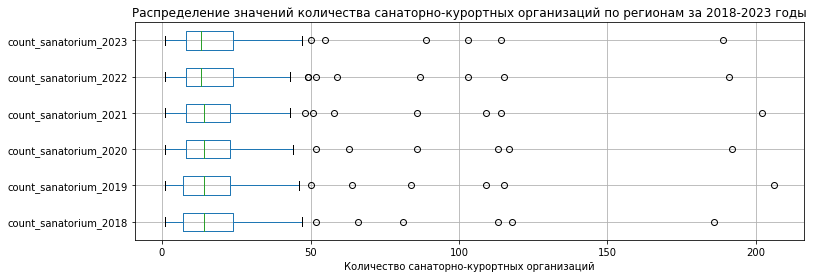

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений количества санаторно-курортных организаций за 2018-2023 года
df_hotel.boxplot(column=['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 'count_sanatorium_2023'], vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества санаторно-курортных организаций по регионам за 2018-2023 годы')
plt.xlabel('Количество санаторно-курортных организаций')

plt.show()

In [30]:
max_value_sanatorium = df_hotel[['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 
                                 'count_sanatorium_2023']].max() # максимальное значение для выбранных столбцов

min_value_sanatorium = df_hotel[['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 
                                 'count_sanatorium_2023']].min()  # минимальное значение для выбранных столбцов  

mean_value_sanatorium = df_hotel[['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 
                                  'count_sanatorium_2023']].mean()# среднее значение для выбранных столбцов  

median_value_sanatorium = df_hotel[['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 
                                    'count_sanatorium_2023']].median() # медиана для тех же столбцов 

std_value_sanatorium = df_hotel[['count_sanatorium_2018', 'count_sanatorium_2019', 'count_sanatorium_2020',
                 'count_sanatorium_2021', 'count_sanatorium_2022', 
                                 'count_sanatorium_2023']].std() # стандартное отклонение для тех же столбцов 

print (f'Максимальное количество санаторно-курортных организаций по годам {max_value_sanatorium}')
print (f'Минимальное количество санаторно-курортных организаций по годам {min_value_sanatorium}')
print (f'Среднее количество санаторно-курортных организаций по годам {mean_value_sanatorium}')
print (f'Медиана количества  санаторно-курортных организацийпо годам {median_value_sanatorium}')
print (f'Стандартное отклонение количества санаторно-курортных организаций по годам {std_value_sanatorium}')

Максимальное количество санаторно-курортных организаций по годам count_sanatorium_2018    186
count_sanatorium_2019    206
count_sanatorium_2020    192
count_sanatorium_2021    202
count_sanatorium_2022    191
count_sanatorium_2023    189
dtype: int64
Минимальное количество санаторно-курортных организаций по годам count_sanatorium_2018    1
count_sanatorium_2019    1
count_sanatorium_2020    1
count_sanatorium_2021    1
count_sanatorium_2022    1
count_sanatorium_2023    1
dtype: int64
Среднее количество санаторно-курортных организаций по годам count_sanatorium_2018    21.666667
count_sanatorium_2019    21.938272
count_sanatorium_2020    21.617284
count_sanatorium_2021    21.802469
count_sanatorium_2022    21.481481
count_sanatorium_2023    21.456790
dtype: float64
Медиана количества  санаторно-курортных организацийпо годам count_sanatorium_2018    14.0
count_sanatorium_2019    14.0
count_sanatorium_2020    14.0
count_sanatorium_2021    14.0
count_sanatorium_2022    13.0
count_sanatori

**Вывод по распределению количества санаторно-курортных организаций за 2018-2023 года**. Распределение количества санаторно-курортных организаций по регионам скошено влево, имеет выбросы в большую сторону. Минимальное значение по всем годам составляет - 1, а максимальное варьируется от 189 до 206, что волне допустимо. 

Медиана значений по годам составляет от 13 до 14, и спад происходит в 2022 году, среднее значение стабильно - 21. Наблюдаются некритичные выбросы в большую сторону. В связи с тем, что медиана и максимальное значение снижается с 2018 по 2023 год, можно сделать вывод о снижении популярности данного типа временного жилья.

**Общий вывод по распределению количества гостиниц, хостелов и санаторно-курортных организаций за 2018-2023 года.** 

В целом, распределения по всем типаж жилья скошены влево, наблюдаются выбросы в большую сторону. Аномальных значений не выявлено. Распределение санаторно-курортных организаций имеет наименьший разброс значений по количеству объектов.

Можно заметить, что наблюдается рост числа гостиниц и хостелов с 2018 к 2023 году, об этом говорит среднее значение и медиана ( гостиницы: среднее рост с 144 до 178, медиана рост с 87 до 113; хостелы  среднее рост с 22 до 32, медиана рост с 8 до 12). А у санаторно-курортных организаций напротив наблюдается падение медианы (с 13 до 14), среднее стабильно - 21, также падает максимальное количество данных объектов с 206 до 189. Это может указывать на снижении популярности данного типа временного проживания. 

### 2. Топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.

In [31]:
# Округляем значения в столбце с общей стоимостью турпакетов до двух знаков после точки 
df_cost['value_realized_packages_2023_ml_rub'] = df_cost['value_realized_packages_2023_ml_rub'].round(2)

# Сохраняем в переменную top_10_packages отсортированный по убыванию столбец с общей стоимостью турпакетов
# Ограничиваем столбец первыми 10 значениями
top_10_packages = df_cost.sort_values(by='value_realized_packages_2023_ml_rub', 
                                      ascending=False).head(10)

display (top_10_packages[['subject','value_realized_packages_2023_ml_rub']])

,subject,value_realized_packages_2023_ml_rub
17,г. Москва,388215.55
9,Московская область,27151.99
29,г. Санкт-Петербург,23785.77
61,Тюменская область,14332.67
60,Свердловская область,14271.07
33,Краснодарский край,14250.55
48,Республика Татарстан,13768.88
51,Пермский край,12592.64
53,Нижегородская область,11545.65
73,Новосибирская область,10433.03


**Вывод.** В топ-10 по стоимости турпакетов за 2023 год, с большим отрывом лидирует г. Москва (388215.55), далее Московская область (27151.99) и г. Санкт-Петербург	(23785.77). Что логично, так как Москва столица и здесь проживают туристы, готовые покупать турпакеты. 

### 3. Изменение среднего количества турпакетов в России по категориям с 2018 по 2023 год.

In [32]:
# Создадим словарь с годами и средним количеством турпакетов по каждой категории 
df_mean_packages = {
'years': ['2018','2019','2020','2021','2022','2023'],
# Считаем по каждой категории среднее количество турпакетов для каждого года  
'mean_packages_russian': [df_firm ['total_count_packages_russian_2018'].mean(),
                          df_firm ['total_count_packages_russian_2019'].mean(),
                          df_firm ['total_count_packages_russian_2020'].mean(),
                          df_firm ['total_count_packages_russian_2021'].mean(),
                          df_firm ['total_count_packages_russian_2022'].mean(),
                          df_firm ['total_count_packages_russian_2023'].mean()],

'mean_packages_russian_countries': [df_firm ['total_count_packages_russian_countries_2018'].mean(),
                df_firm ['total_count_packages_russian_countries_2019'].mean(),
                df_firm ['total_count_packages_russian_countries_2020'].mean(),    
                df_firm ['total_count_packages_russian_countries_2021'].mean(),
                df_firm ['total_count_packages_russian_countries_2022'].mean(),
                df_firm ['total_count_packages_russian_countries_2023'].mean()],

'mean_packages_citizens_countries': [df_firm ['total_count_packages_citizens_countries_russian_territory_2018'].mean(),     
                df_firm ['total_count_packages_citizens_countries_russian_territory_2019'].mean(),
                df_firm ['total_count_packages_citizens_countries_russian_territory_2020'].mean(),
                df_firm ['total_count_packages_citizens_countries_russian_territory_2021'].mean(),
                df_firm ['total_count_packages_citizens_countries_russian_territory_2022'].mean(),
                df_firm ['total_count_packages_citizens_countries_russian_territory_2023'].mean()]}

display (df_mean_packages)

{'years': ['2018', '2019', '2020', '2021', '2022', '2023'],
 'mean_packages_russian': [20957.30769230769,
  27014.910256410258,
  26833.589743589742,
  35698.8875,
  38866.333333333336,
  41666.225],
 'mean_packages_russian_countries': [32178.8125,
  37287.91025641026,
  12979.846153846154,
  23690.853658536584,
  27941.2875,
  36690.41463414634],
 'mean_packages_citizens_countries': [4571.865853658536,
  4025.9358974358975,
  224.5487804878049,
  153.5125,
  129.3048780487805,
  323.6829268292683]}

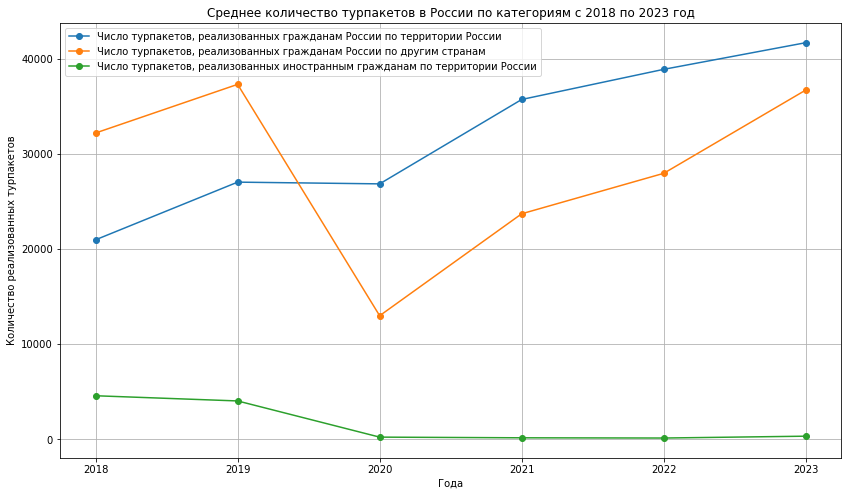

In [33]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 8))
  
# Строим линейный график по трем категориям
plt.plot(df_mean_packages['years'], df_mean_packages['mean_packages_russian'], 
         label = 'Число турпакетов, реализованных гражданам России по территории России', marker='o')  
plt.plot(df_mean_packages['years'], df_mean_packages['mean_packages_russian_countries'], 
         label = 'Число турпакетов, реализованных гражданам России по другим странам', marker='o') 
plt.plot(df_mean_packages['years'], df_mean_packages['mean_packages_citizens_countries'], 
         label = 'Число турпакетов, реализованных иностранным гражданам по территории России', marker='o')

plt.legend()
plt.grid()
plt.title('Среднее количество турпакетов в России по категориям с 2018 по 2023 год')
plt.xlabel ('Года')
plt.ylabel ('Количество реализованных турпакетов')

plt.show() # Отображение графика  

**Вывод.** Наблюдается рост внутреннего туризма - число турпакетов, реализованных гражданам России по территории России (с 20957 в 2018 году до 41666 в 2023 году). Международные туры, реализованные гражданам России сильно падали в 2019 году и дотигли в 2020 минимального значения за весь период для данной категории (12979), затем наблюдается рост, но достигнуть показателя 2019 года к 2023 году не удалось (2019 год - 37287, 2023 - 36690).

## Проверка гипотез.

**Проверим гипотезу, что средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей.** Однако этот показатель может быть больше. Проведем статистический тест, который поможет определить, можно ли отвергнуть нулевую гипотезу в пользу альтернативной.
 - Нулевая гипотеза Н0: средняя стоимость реализованных турпакетов в 2023 году =  800 (млн. рублей),
 - Альтернативная гипотеза H1: средняя стоимость реализованных турпакетов в 2023 году >  800 (млн. рублей).
 
Параметры теста:
- в качестве уровня статистической значимости выбраем значение на практике: `α=0.05`, это стандартный порог в статистике при проверке продуктовых гипотез,
- ожидаемая средняя цена (млн. руб.) - `expected_mean_price = 800`,
- альтернативная гипотеза `больше` -  `alternative='greater'` (правосторонняя альтернативная гипотеза).

Будем использовать данные `df_cost['value_realized_packages_2023_ml_rub']` о стоимости турпакетов за 2023 год. В данном столбце после преобразования типа данных в числовой образовались два дначения `nan`. Данное число не критично, поэтому удалим эти значения в процессе проведения теста.

In [34]:
# Сохраняем в переменную 'total_cost_2023' данные о стоимости турпакетов за 2023 год
total_cost_2023 = df_cost['value_realized_packages_2023_ml_rub']

# Ожидаемая средняя цена, млн. руб. 
expected_mean_cost = 800

# Уровень статистической значимости
alpha = 0.05

# Проводим одновыборочный тест
results = st.ttest_1samp(np.array(total_cost_2023)[~np.isnan(total_cost_2023)], expected_mean_cost,
    alternative='greater')

# Выводим результаты
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04555477069383043
Отвергаем нулевую гипотезу


**Вывод.** Поскольку p-значение (0.0456) меньше уровня значимости (обычно 0.05), это позволяет отвергнуть нулевую гипотезу (H0. Таким образом, можно сделать вывод, что существуют статистически значимые доказательства в пользу альтернативной гипотезы (H1), что средняя стоимость реализованных турпакетов в 2023 году больше 800 милн руб. 

**Статистика говорит, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты. Проверим это с помощью двухвыборочного статистического теста.** Сформулируем гипотезы:

 - Нулевая гипотеза (H0): среднее количество оформленных турпакетов в 2023 году равно среднему количеству оформленных турпакетов в 2022 году.
 - Альтернативная гипотеза (H1): среднее количество оформленных турпакетов в 2023 году больше, чем среднее количество оформленных турпакетов в 2022 году.
 
Параметры теста:
- в качестве уровня статистической значимости выбраем значение на практике: `α=0.05`, это стандартный порог в статистике при проверке продуктовых гипотез,
- `total_pack_2022` и `total_pack_2023` - набор данных первой и второй выборки соответственно,
- альтернативная гипотеза `меньше` -  `alternative='less'` (левосторонняя альтернативная гипотеза). 

В столбцах `df_firm ['total_count_tour_packages_2022']` и `df_firm ['total_count_tour_packages_2023']`, хранится информация, которую мы будем использовать для проведения теста. После преобразования типов данных в числовой образовались четыре значения `nan` в данных столбцах, это количество не критично - удалим эти значения в процессе проведения теста.

In [35]:
# Сохраняем в переменную 'total_pack_2022' общее количество турпакетов реализованных в 2022 году
total_pack_2022 = df_firm ['total_count_tour_packages_2022']

# Сохраняем в переменную 'total_pack_2023' общее количество турпакетов реализованных в 2022 году
total_pack_2023 = df_firm ['total_count_tour_packages_2023']

# Уровень статистической значимости
alpha = 0.05 

# Проводим двухвыборочный тест
results = st.ttest_ind(
    np.array(total_pack_2022)[~np.isnan(total_pack_2022)], 
    np.array(total_pack_2023)[~np.isnan(total_pack_2023)],
    alternative='less') # Альтернативная гипотеза, которую проверяем: mu1 < mu2

# Выводим результаты
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4055340882011983
Не получилось отвергнуть нулевую гипотезу


**Вывод.** На основании полученного p-значения (0.4055), которое значительно превышает уровень значимости (0.05), мы не можем отвергнуть нулевую гипотезу. Это значит, что нет статистически значимого различия в среднем количестве оформленных турпакетов в 2023 и 2022 году.

## Итоговый вывод и рекомендации.

В процессе изучения данных о туризме в России, был проведен анализ числа гостиниц, хостелов, санаторно-курортных организаций с 2018 по 2023 год, а также стоимости турпакетов по регионам в 2023 году и изменения среднего количества турпакетов по категориям с 2018 по 2023 год.

Основной задачей исследования являлось детально изучить данные о туризме в России, а также проверить несколько гипотез, которые покажут динамику туристической индустрии.

**Распределение числа гостиниц, хостелов, санаторно-курортных организаций в России с 2018 по 2023 год.**

Можно отметить, что распределение всех типов жилья смещены влево с наличием редких выбросов в положительную сторону, что говорит о высоких значениях в отдельных регионах. 

Рост числа гостиниц и хостелов очевиден: средние показатели увеличиваются с 144 до 178 (гостиницы) и с 22 до 32 (хостелы), а медианные значения — с 87 до 113 и с 8 до 12 соответственно. Это свидетельствует о расширении данных сегментов. Количество санаторно-курортных организаций показывает признаки снижения: медиана практически не изменилась (13 до 14), а среднее — остается стабильным около 21. Максимальные показатели уменьшились с 206 до 189, что может указывать на снижение интереса к данному виду проживания. 

В качестве рекомендации целесообразно учитывать тенденцию роста гостиниц и хостелов и расширить их базу.

**Стоимость турпакетов по регионам в 2023 году.**

Исследовательский анализ данных позволил выявить топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году. Отрыв Москвы от  остальных регионов существенный (388215.55), далее Московская область (27151.99). Это подтверждает, что в Москве сосредоточена большая покупательская активность туристов. 

В данном случае можно рекомендовть использовать данные о предпочтениях московских туристов для предложения специальных предложений и скидок.

**Изменение среднего количества турпакетов в России по категориям с 2018 по 2023 год.**

За период с 2018 по 2023 год наблюдается значительный рост внутреннего туризма — число реализованных турпакетов гражданам России внутри страны увеличилось с 20 957 до 41 666, что говорит о растущем спросе на внутренние направления.

В то же время международный туризм пережил сильный спад: в 2020 году количество реализованных турпакетов снизилось до 12 979, а к 2023 году осталось немного ниже показателя 2019 — 36 690 против 37 287, что говорит о восстановлении, но не полном. Это может быть связано с короновирусом в 2020 году. 

В качестве рекомендации, учитывая двукратный рост, целесообразно расширять предложения и маркетинговые кампании в рамках внутреннего туризма.

**Проверка гипотез.**

Статистический тест, с помощью которого была проведена проверка нулевой и альтернативной гипотез: 
- H0: средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн руб.,
- H1: средняя стоимость реализованных турпакетов в 2023 году > 800 (млн. руб.),

показал, что `p-значение` (0.0456) меньше уровня значимости (обычно 0.05), это позволяет принять гипотезу H1, что говорит о том, что средняя стоимость реализованных турпакетов в 2023 году больше 800 млн. руб.

Также, был проведен ститистический тест, который проверил следующие нулевую и альтернативную гипотезы:
- H0: среднее количество оформленных турпакетов в 2023 году равно среднему количеству оформленных турпакетов в 2022 году,
- H1: среднее количество оформленных турпакетов в 2023 году больше, чем среднее количество оформленных турпакетов в 2022 году.

Полученного `p-значения` (0.4055), превысило уровень значимости (0.05), это означает, что мы не отвергаем нулевую гипотезу и статистически значимого различия в среднем количестве оформленных турпакетов в 2023 и 2022 году нет.


